In [20]:
import gym
%pylab inline
import pylab
import numpy as np

# To get smooth animations
%matplotlib inline
import matplotlib as mpl
mpl.rc('animation', html='jshtml')
import matplotlib.animation as animation

Populating the interactive namespace from numpy and matplotlib


/Users/carson/Desktop/Projects/max_ent_irl/env/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['pylab', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Maximum Entropy Inverse Reinforcement Learning (MaxEntIRL)

The Mountain Car problem is "on a one-dimensional track, positioned between two “mountains”. The goal is to drive up the mountain on the right; however, the car’s engine is not strong enough to scale the mountain in a single pass. Therefore, the only way to succeed is to drive back and forth to build up momentum."

<img src='https://miro.medium.com/max/1104/1*JjBfoFrKCoBxlraVZaEshw.jpeg'>

The car’s state, at any point in time, is given by a vector containing its horizonal position and velocity. The car commences each episode stationary, at the bottom of the valley between the hills (at position, x, approximately -0.5), and the episode ends when either the car reaches the flag (position > 0.5) or after 200 moves.

Your state, s, is a 2-dim vector that will be (position, velocity) or (x,v) of (-0.5,0) in the beginning because the velocity is 0 and x = -0.5 is the valley between the two mountains which is left of center (there is about a distance of 1.1 in front of you and a distance of -0.7 behind you). Only the x-axis is part of the state, the elevation (y-axis) and gravity is implicit. 

The velocity is positive is you are moving forward to the right, and negative if you are moving to the left. 

action 0 is do nothing, action 1 is run the car in reverse towards the left mountain located at `state[0]=-1.2`,
action 2 is run the car forward towards `state[0]=0.6`


In [2]:
# # MACROS
Push_Left = 0
No_Push = 1
Push_Right = 2

In [3]:
# Initialize environment and reset it to start at valley with 0 velocity
env = gym.make('MountainCar-v0')
env.reset() # array([-0.44943939,  0.        ])

# experiment with constantly moving in one direction or the other to see what happens
const_action = No_Push
for t in range(100):
    update = env.step(const_action)
    if t % 5 == 0:
        print(update)
    
# if you do nothing you jus swing side to side, but your position stays in (-0.64,-0.4)
# your velocity stays in (-0.01,+0.01)

(array([-0.45264661, -0.00053203]), -1.0, False, {})
(array([-0.46301634, -0.00305709]), -1.0, False, {})
(array([-0.48451489, -0.00502638]), -1.0, False, {})
(array([-0.5132132 , -0.00607419]), -1.0, False, {})
(array([-0.54382822, -0.00600163]), -1.0, False, {})
(array([-0.57071126, -0.00482258]), -1.0, False, {})
(array([-0.58892342, -0.00276034]), -1.0, False, {})
(array([-5.95145028e-01, -1.96750342e-04]), -1.0, False, {})
(array([-0.58824873,  0.00240243]), -1.0, False, {})
(array([-0.56948436,  0.00456569]), -1.0, False, {})
(array([-0.54227365,  0.00589388]), -1.0, False, {})
(array([-0.51161748,  0.00613616]), -1.0, False, {})
(array([-0.48317242,  0.0052462 ]), -1.0, False, {})
(array([-0.46217338,  0.00339331]), -1.0, False, {})
(array([-0.45245648,  0.00092283]), -1.0, False, {})
(array([-0.4557844 , -0.00171466]), -1.0, False, {})
(array([-0.47155447, -0.0040415 ]), -1.0, False, {})
(array([-0.49689698, -0.00563089]), -1.0, False, {})
(array([-0.52716354, -0.00618448]), -1

In [4]:
# Initialize environment and reset it to start at valley with 0 velocity
env = gym.make('MountainCar-v0')
env.reset() # array([-0.44943939,  0.        ])

# experiment with constantly moving in one direction or the other to see what happens
# constantly do nothing
const_action = No_Push
for t in range(100):
    update = env.step(const_action)
    if t % 5 == 0:
        print(update)
    
# if you do nothing you jus swing side to side, but your position stays in (-0.64,-0.4)
# your velocity stays in (-0.01,+0.01)

(array([-0.43813188, -0.00063863]), -1.0, False, {})
(array([-0.45058257, -0.00367118]), -1.0, False, {})
(array([-0.47641299, -0.00604115]), -1.0, False, {})
(array([-0.51092515, -0.00730737]), -1.0, False, {})
(array([-0.54777544, -0.00722662]), -1.0, False, {})
(array([-0.58016789, -0.00581459]), -1.0, False, {})
(array([-0.60216543, -0.00334173]), -1.0, False, {})
(array([-6.09782027e-01, -2.66477044e-04]), -1.0, False, {})
(array([-0.60164953,  0.00285652]), -1.0, False, {})
(array([-0.57922902,  0.00546543]), -1.0, False, {})
(array([-0.54658469,  0.00707928]), -1.0, False, {})
(array([-0.50970178,  0.00739043]), -1.0, False, {})
(array([-0.47538258,  0.00633843]), -1.0, False, {})
(array([-0.44993357,  0.00412612]), -1.0, False, {})
(array([-0.43798154,  0.00116771]), -1.0, False, {})
(array([-0.44167717, -0.00200009]), -1.0, False, {})
(array([-0.46035723, -0.00480874]), -1.0, False, {})
(array([-0.49064614, -0.00674501]), -1.0, False, {})
(array([-0.52700708, -0.0074431 ]), -1

In [5]:
# Initialize environment and reset it to start at valley with 0 velocity
env = gym.make('MountainCar-v0')
env.reset() # array([-0.44943939,  0.        ])

# experiment with constantly moving in one direction or the other to see what happens
# constantly go right
const_action = Push_Right
for t in range(100):
    update = env.step(const_action)
    if t % 5 == 0:
        print(update)
    
# if you constantly go right,  your position stays in (-0.52,-0.24)
# your velocity stays in (-0.011,+0.011)

(array([-4.37336407e-01,  3.62860627e-04]), -1.0, False, {})
(array([-0.4302616 ,  0.00208626]), -1.0, False, {})
(array([-0.41556892,  0.00343941]), -1.0, False, {})
(array([-0.39584678,  0.00418977]), -1.0, False, {})
(array([-0.37451123,  0.00422046]), -1.0, False, {})
(array([-0.35517125,  0.003545  ]), -1.0, False, {})
(array([-0.34100973,  0.00229288]), -1.0, False, {})
(array([-0.33429814,  0.00067657]), -1.0, False, {})
(array([-0.33609428, -0.00104581]), -1.0, False, {})
(array([-0.34611629, -0.00260396]), -1.0, False, {})
(array([-0.36277521, -0.00374666]), -1.0, False, {})
(array([-0.38337187, -0.00427624]), -1.0, False, {})
(array([-0.40447702, -0.00408599]), -1.0, False, {})
(array([-0.42248273, -0.0031904 ]), -1.0, False, {})
(array([-0.43424526, -0.00173377]), -1.0, False, {})
(array([-4.37682398e-01,  3.10817576e-05]), -1.0, False, {})
(array([-0.43218185,  0.00179039]), -1.0, False, {})
(array([-0.41872267,  0.00323149]), -1.0, False, {})
(array([-0.39968137,  0.004104

In [6]:
# Initialize environment and reset it to start at valley with 0 velocity
env = gym.make('MountainCar-v0')
env.reset() # array([-0.44943939,  0.        ])

# experiment with constantly moving in one direction or the other to see what happens
# constantly go left
const_action = Push_Left
for t in range(100):
    update = env.step(const_action)
    if t % 5 == 0:
        print(update)
    
# if you constantly go left,  your position stays in (-0.85,-0.48)
# your velocity stays in (-0.015,+0.011)

(array([-0.47292767, -0.00138886]), -1.0, False, {})
(array([-0.49998935, -0.00797622]), -1.0, False, {})
(array([-0.55603156, -0.0130948 ]), -1.0, False, {})
(array([-0.63074264, -0.01581213]), -1.0, False, {})
(array([-0.71072248, -0.01575186]), -1.0, False, {})
(array([-0.78267634, -0.01319115]), -1.0, False, {})
(array([-0.83612565, -0.00883728]), -1.0, False, {})
(array([-0.86447993, -0.00347273]), -1.0, False, {})
(array([-0.8647229,  0.0022422]), -1.0, False, {})
(array([-0.83683024,  0.00773404]), -1.0, False, {})
(array([-0.7837634 ,  0.01237077]), -1.0, False, {})
(array([-0.71204701,  0.01538836]), -1.0, False, {})
(array([-0.63209743,  0.01603496]), -1.0, False, {})
(array([-0.5571805 ,  0.01391158]), -1.0, False, {})
(array([-0.50072221,  0.0092501 ]), -1.0, False, {})
(array([-0.47310944,  0.00288377]), -1.0, False, {})
(array([-0.47941795, -0.00401114]), -1.0, False, {})
(array([-0.51849089, -0.01017023]), -1.0, False, {})
(array([-0.58313411, -0.01445447]), -1.0, False,

In [7]:
print('Action space: ', env.action_space)
n_actions = env.action_space.n

Action space:  Discrete(3)


In [8]:
'''
To descretize the state space, we separate the range of possible continuous positions x and
continuous velocities v into 20 bins (one_feature)
'''

n_feature_bins = 20 # number of state per one feature

env_low = env.observation_space.low     
env_high = env.observation_space.high   
env_distance = (env_high - env_low) / n_feature_bins 

print(env_low, env_high, env_distance, env_distance[0]*20, env_distance[1]*20)
# the range of x is 1.8 and velocity is 0.14 

n_states = n_feature_bins*n_feature_bins # states are the space of combinations of x and v

[-1.2  -0.07] [0.6  0.07] [0.09  0.007] 1.8000000715255737 0.14000000432133675


in the update, the tuple  (array([-0.66511328, -0.01531442]), -1.0, False, {})
 contains the (state, reward, end_of_episode_bool, meta_data)
the meta_data is empty for this environment, there is a negative reward for every timestep that 
 you have not reached the goal yet. 

In [9]:
# load the expert 20 demonstrations
#expert_demo = np.load('/shared/Carson/RL/lets-do-irl/mountaincar/maxent/expert_demo/expert_demo.npy')
expert_demo = np.load('Data/expert_demo.npy')
print(expert_demo.shape)
# (number of demonstrations, length of demonstrations, states and actions of demonstrations)
print(expert_demo[0,60,:], expert_demo[0,0,:].shape)
# as you can see from step 60 of the first example, the best strategy is to first accelerate backwards into
# the < -0.8 range into order to gain speed going right into the valley. 

(20, 130, 3)
[-0.90691623 -0.02983074  0.        ] (3,)


In [10]:
'''
using this bin size we descretize the expert demonstrations
The difference between expert_demo and demonstrations is that
demonstrations consists of discreet integers instead of continuous values
for it's states



here I used n for sample index and t for timestep index
'''
def idx_state(state):
    '''
    this function converts a continuous state vector of
    2-dim into a discrete index
    
    by assigning each state and index of state_idx = position_idx + velocity_idx * one_feature
    we make sure that (position_idx, velocity_idx) = (2,3) and (3,2) map to different integers
    The first 20 elements of state_idx go to position_idx = 0 - 19, velocity_idx = 0, etc
    '''
    position_idx = int((state[0] - env_low[0]) / env_distance[0])
    velocity_idx = int((state[1] - env_low[1]) / env_distance[1])
    state_idx = position_idx + velocity_idx * n_feature_bins
    return state_idx

demonstrations = np.zeros((len(expert_demo), len(expert_demo[0]), 3))

for n in range(len(expert_demo)):
    
    for t in range(len(expert_demo[0])):

        state_idx = idx_state(expert_demo[n][t])

        demonstrations[n][t][0] = state_idx
        demonstrations[n][t][1] = expert_demo[n][t][2] 

Q-Learning is a “model-free, off-policy” RL algorithm.

“model-free” because we are not trying to build a pre-determined model of our environment (which may or may not be accurate)

“off-policy” because our behavior in interacting with (or exploring) the environment may be unrelated to what we believe to be the best optimal at the time of taking the action.

You might think of Q-learning as updating a table where each row is a different state and each column is an action that can be taken in that state and where they intersect is the Q-value for that state action pair. the Q-table maps various (state, action) pairs with the Q-value (the expected sum of discounter future rewards when taking action a in state s and behaving optimally thereafter)

It doesnt have to be a square table like this though, Q just has to map some state or state-action to some Q-value

In the above example you can see that the pattern is that we observe some state, s, take an action a, and receive a new state s’, then repeat. 

The update rule is the weighted average of the old Q(s,a) value and the Q value implied by the new observation. That is, the sum of (i) the immediate reward and (ii) the expected discounted reward received from the new state onwards, assuming you always choose the optimal action.

Q’(s,a) = (1 — alpha) * Q(s, a) + alpha *(r + gamma * Q(s’, argmax a’ : Q(s’, a’)))

where argmax a’ : Q(s’, a’) is the action  a’ that has the highest current Q value among our row of states s’

This equation for update is equivalently written 

𝑄(𝑠,𝑎)←𝑄(𝑠,𝑎)+𝛼(𝑟+𝛾*max_𝑎′𝑄(𝑠′,𝑎′)−𝑄(𝑠,𝑎)) 


In [11]:


def update_q_table(state, action, reward, q_learning_rate, gamma, next_state):
    ''' 
    The Q-learning update rule
    𝑄(𝑠,𝑎)←𝑄(𝑠,𝑎)+𝛼(𝑟+𝛾*max_𝑎′𝑄(𝑠′,𝑎′)−𝑄(𝑠,𝑎))
    𝛾 or gamma, is the discount factor
    𝛼 or alpha, is the q_learning_rate
    '''
    q_1 = q_table[state][action]
    #print(reward, gamma, max(q_table[next_state])) 
    q_2 = reward + gamma * max(q_table[next_state])
    q_table[state][action] += q_learning_rate * (q_2 - q_1)

# What is Inverse Reinforcement Learning (IRL)

In IRL, instead of randomly exploring the world learning by trial and error, we want to approximate the reward function that experts are using by observing expert demonstrations. This reward function is parameterized by theta

if $f_si$ is the feature vector of some state_i, then the reward = theta.dot(f_si)

In [12]:
def get_reward(feature_matrix, theta, n_states, state_idx):
    
    '''
    theta is the same length as the number of states, so this
    just a list of the rewards associated with being in each 
    state and the function here simply selects the
    element in theta that corresponds to the sate
    '''
    
    irl_rewards = feature_matrix.dot(theta).reshape((n_states,))
    
    return irl_rewards[state_idx]

# What is the Objective Function in MaxEntIRL?

Maximizing the entropy of the distribution over paths subject to the feature constraints from observed data implies that we maximize the likelihood of the observed data under the maximum entropy (exponential family) distribution.

The Product of Probabilites vs The Log Sum of Probabilities

$
\log \left(\prod_i P(x_i)\right) = \sum_i \log \left( P(x_i)\right)
$

the logarithm is a monotonic transformation that preserves the locations of the extrema, in particular, the estimated parameters in maximum-likelihood are identical for the original and the log-transformed formulation, while also morenumerically stable and symbolically easier to differentiate than the former since the sum rule is easier than the product rule for differentiation

Find the Reward Parameters that maximize the likelihood of the expert trajectories, theta_star

$ 
\theta^{*} = \underset{\theta}{\arg\max} \underset{demonstrations}\prod[P(trajectories|\theta)] = \underset{\theta}{\arg\max} \underset{demonstrations}\sum log[P(trajectories|\theta)] = \underset{\theta}{\arg\max} L(\theta)
$

The gradient for this Loss function L is

$\nabla L(\theta) = f_{expert} - \underset{trajectories}\sum P(trajectory|\theta)f_{learner}
= f_{expert} - \underset{states}\sum D_{s} f_{s}
$

Where D_s is the expected state visitation frequencies

gradient = expected_expert_feats - expected_learner_feats

In [13]:
def update_theta(expert, learner, theta, theta_learning_rate):
    '''
    The gradient is the difference between expected
    empirical feature counts and the learner’s expected feature
    counts, which can be expressed in terms of expected state
    visitation frequencies, D_si
    
    the two lines below apply these two formulas
    
    ∇𝐿(𝜃)=𝑓_𝑒𝑥𝑝𝑒𝑟𝑡−∑𝑡𝑟𝑎𝑗𝑒𝑐𝑡𝑜𝑟𝑖𝑒𝑠𝑃(𝑡𝑟𝑎𝑗𝑒𝑐𝑡𝑜𝑟𝑦|𝜃)𝑓_𝑙𝑒𝑎𝑟𝑛𝑒𝑟=𝑓_𝑒𝑥𝑝𝑒𝑟𝑡−∑𝑠𝑡𝑎𝑡𝑒𝑠𝐷𝑠𝑓𝑠
    
    𝜃 := 𝜃 + 𝛼∇𝐿(𝜃)
    
    where 𝛼 is the theta_learning_rate, not the q-learning learning rate
    '''
    gradient = expert - learner
    theta += theta_learning_rate * gradient

    # Clip theta
    for j in range(len(theta)):
        if theta[j] > 0:
            theta[j] = 0

In [14]:
feature_matrix = np.eye((n_states)) # (400, 400)

print(feature_matrix)

def get_expert_feature_expectations(feature_matrix, demonstrations):
    '''
    f_tilda = (1/m)*sum all trajectory's feature count
    Since our states are encoded as indices for 400 possible states, 
    this function adds together one-hot encodings of
    every state visited by each expert demonstration throughout the
    example trajectory and at the end divides the total number of 
    example trajectories (expert demonstrations)
    
    for each 400 states indices, aka each (x,v) pairs, 
    value of 0.5 at that index means that 50% of all trajectories have this state
    '''
    feature_expectations = np.zeros(feature_matrix.shape[0])
    
    for demonstration in demonstrations:
        for state_idx, _, _ in demonstration:
            feature_expectations += feature_matrix[int(state_idx)]

    feature_expectations /= demonstrations.shape[0]
    return feature_expectations

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


0 episode score is -200.00
MaxEnt Update
1000 episode score is -200.00
MaxEnt Update
2000 episode score is -200.00
MaxEnt Update
3000 episode score is -189.13
saving new best
MaxEnt Update
4000 episode score is -197.84
MaxEnt Update
5000 episode score is -179.80
saving new best
MaxEnt Update
6000 episode score is -184.78
MaxEnt Update
7000 episode score is -144.87
saving new best
MaxEnt Update
8000 episode score is -175.97
MaxEnt Update
9000 episode score is -183.56
MaxEnt Update
10000 episode score is -194.88
MaxEnt Update
11000 episode score is -132.83
saving new best
MaxEnt Update
12000 episode score is -123.26
saving new best
MaxEnt Update
13000 episode score is -122.94
saving new best
MaxEnt Update
14000 episode score is -122.94
MaxEnt Update
15000 episode score is -125.14
MaxEnt Update
16000 episode score is -123.01
MaxEnt Update
17000 episode score is -123.73
MaxEnt Update
18000 episode score is -140.47
MaxEnt Update
19000 episode score is -134.20
MaxEnt Update
20000 episode sco

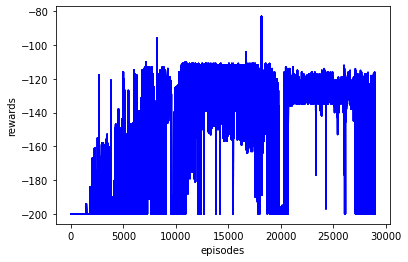

In [25]:
np.random.seed(42)

'''
Theta θ is the vector containing the reward weights. 
reward(state_t) = np.dot(θ,f(state_t)), where f is the feature vector of state_t
'''
theta_learning_rate = 0.05
theta = -(np.random.uniform(size=(n_states,))) #(400,)
gamma = 0.99
q_learning_rate = 0.03

expected_expert_feats = get_expert_feature_expectations(feature_matrix, demonstrations) # (400,)
#print(expected_expert_feats[370:380], expected_expert_feats.shape)

q_table = np.zeros((n_states, n_actions)) # (400, 3)
#q_table = np.random.randint(-200, 0, (n_states, n_actions))

'''
initialize the learner_feature_counts that when divided by the number of updates 
becomes the 
'''
learner_feature_counts = np.zeros(n_states)

episodes = []
scores = []
best_score = -200
for episode in range(30000):
    
    state = env.reset()
    score = 0

    if (episode >= 1000 and episode % 1000 == 0):
        
        print('MaxEnt Update')
        
        expected_learner_feats = learner_feature_counts / episode
        
        update_theta(expected_expert_feats, expected_learner_feats, theta, theta_learning_rate)

    # For each episode, run the simulation until the 200 step time limit or success
    while True:
        state_idx = idx_state(state)
        action = np.argmax(q_table[state_idx]) # get the best column, action, from the Q-table
        next_state, reward, done, _ = env.step(action) # take action, get new state
     
        # get approximated reward
        irl_reward = get_reward(feature_matrix, theta, n_states, state_idx) 
        
        next_state_idx = idx_state(next_state) 
        
        # update the Q-table using the Q-learning update rule and the approximated reward 
        update_q_table(state_idx, action, irl_reward, q_learning_rate, gamma, next_state_idx)

        learner_feature_counts += feature_matrix[int(state_idx)]

        score += reward
        state = next_state

        if done:
            scores.append(score)
            episodes.append(episode)
            break

    if episode % 1000 == 0:
        score_avg = np.mean(scores[-100:])
        print('{} episode score is {:.2f}'.format(episode, score_avg))
        if score_avg > -110:
            print('solved!')
            break
        pylab.plot(episodes, scores, 'b')
        pylab.xlabel('episodes')
        pylab.ylabel('rewards')
        pylab.savefig("Data/maxent_30000.png")
        
        if score_avg > best_score:
            best_score = score_avg
            print('saving new best')
            np.save("Data/maxent_q_table", arr=q_table)
        
        

In [26]:
q_table

array([[ 0.        ,  0.        ,  0.        ],
       [-0.24387644,  0.        ,  0.        ],
       [-1.05937466, -0.87137885, -0.99511691],
       ...,
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [27]:
def render_policy_net(q_table, n_max_steps=200, seed=42):
    frames = []
    env = gym.make('MountainCar-v0')
    env.seed(seed)
    np.random.seed(seed)
    state = env.reset()
    score = 0
    for step in range(n_max_steps):
        frames.append(env.render(mode="rgb_array"))
        
        state_idx = idx_state(state)
        action = np.argmax(q_table[state_idx])
        
        state, reward, done, info = env.step(action)
        score += reward
        
        if done:
            break
            
    env.close()
    print('score',score)
    return frames

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [28]:
q_table = np.load("Data/maxent_q_table.npy")
frames = render_policy_net(q_table)
plot_animation(frames)

score -116.0


In [29]:
q_table = np.zeros((n_states, n_actions))
frames = render_policy_net(q_table)
plot_animation(frames)

score -200.0
